In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('saline_final_test.xlsx')
data.head(10)

,T_water,T_inside_glass,Ambient_Temperature,Irradiance,Hourly_Productivity,Mirror
0,30.648048,42.261090,24.836431,503.677883,0.000942,0
1,31.019030,42.782960,24.825085,503.673230,0.000941,0
2,32.918222,44.330141,25.642509,532.695245,0.000243,0
3,33.708846,45.065131,26.182776,551.631701,0.000239,0
4,34.940351,46.238222,27.049364,581.997313,0.000233,0
5,35.889947,47.121659,27.699846,604.631352,0.000132,0
6,36.998516,48.316187,28.456220,631.131177,-0.000660,0
7,37.948112,48.316337,29.106701,641.412495,-0.001402,0
8,38.906297,47.528913,30.947931,658.090365,0.009710,0
9,39.041981,47.381726,31.055984,654.376148,0.010500,0


In [3]:
data.shape

(370, 6)

In [4]:
data.describe()

,T_water,T_inside_glass,Ambient_Temperature,Irradiance,Hourly_Productivity,Mirror
count,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000
mean,43.030009,52.094492,31.967650,530.893491,0.047259,1.997297
std,9.924879,12.128538,2.750258,261.670821,0.041913,1.122566
min,28.138326,30.030097,22.613502,-9.384841,-0.002706,0.000000
25%,33.621468,43.634037,30.176835,434.320077,0.000806,1.000000
50%,43.466377,49.681394,32.546772,601.877319,0.040883,3.000000
75%,50.929474,62.560178,33.854797,764.526140,0.078343,3.000000
max,62.820060,70.876488,36.921123,847.031800,0.138698,3.000000


In [9]:
len(data[data['Hourly_Productivity']<0])

31

In [5]:
import scipy

In [46]:
from scipy.stats import skew
print(skew(data,axis=0, bias=True))

[ 0.17160727  0.09231662 -1.02197684 -0.76598258  0.39046452 -0.51263708]


In [47]:
from scipy.stats import kurtosis
print(kurtosis(data,axis=0, bias=True))

[-1.27229336 -1.04899173  1.60826176 -0.80244941 -0.95149119 -1.2852221 ]


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   T_water              370 non-null    float64
 1   T_inside_glass       370 non-null    float64
 2   Ambient_Temperature  370 non-null    float64
 3   Irradiance           370 non-null    float64
 4   Hourly_Productivity  370 non-null    float64
 5   Mirror               370 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 17.5 KB


In [49]:
features_with_na = [features for features in data.columns if data[features].isnull().sum()>1]
print(len(features_with_na))

0


                      T_water  T_inside_glass  Ambient_Temperature  \
T_water              1.000000        0.833719             0.673314   
T_inside_glass       0.833719        1.000000             0.700505   
Ambient_Temperature  0.673314        0.700505             1.000000   
Irradiance           0.479665        0.815025             0.598989   
Hourly_Productivity  0.924691        0.642695             0.509699   
Mirror               0.395717        0.440977             0.237019   

                     Irradiance  Hourly_Productivity    Mirror  
T_water                0.479665             0.924691  0.395717  
T_inside_glass         0.815025             0.642695  0.440977  
Ambient_Temperature    0.598989             0.509699  0.237019  
Irradiance             1.000000             0.192391  0.112282  
Hourly_Productivity    0.192391             1.000000  0.437381  
Mirror                 0.112282             0.437381  1.000000  


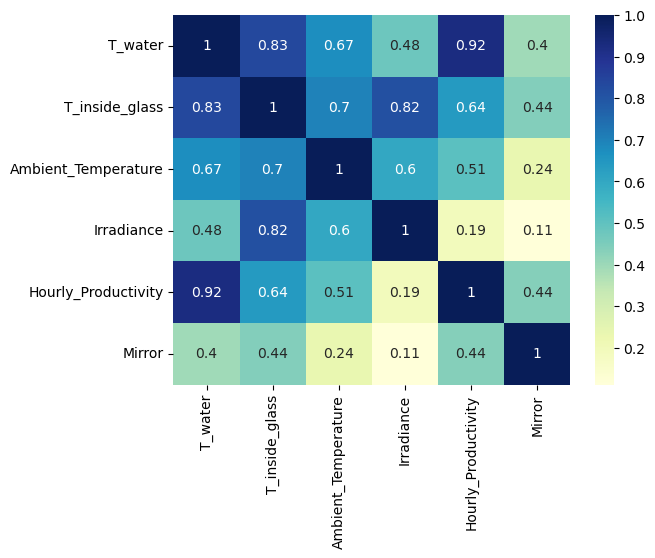

In [50]:
print(data.corr())
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

<Figure size 800x640 with 0 Axes>

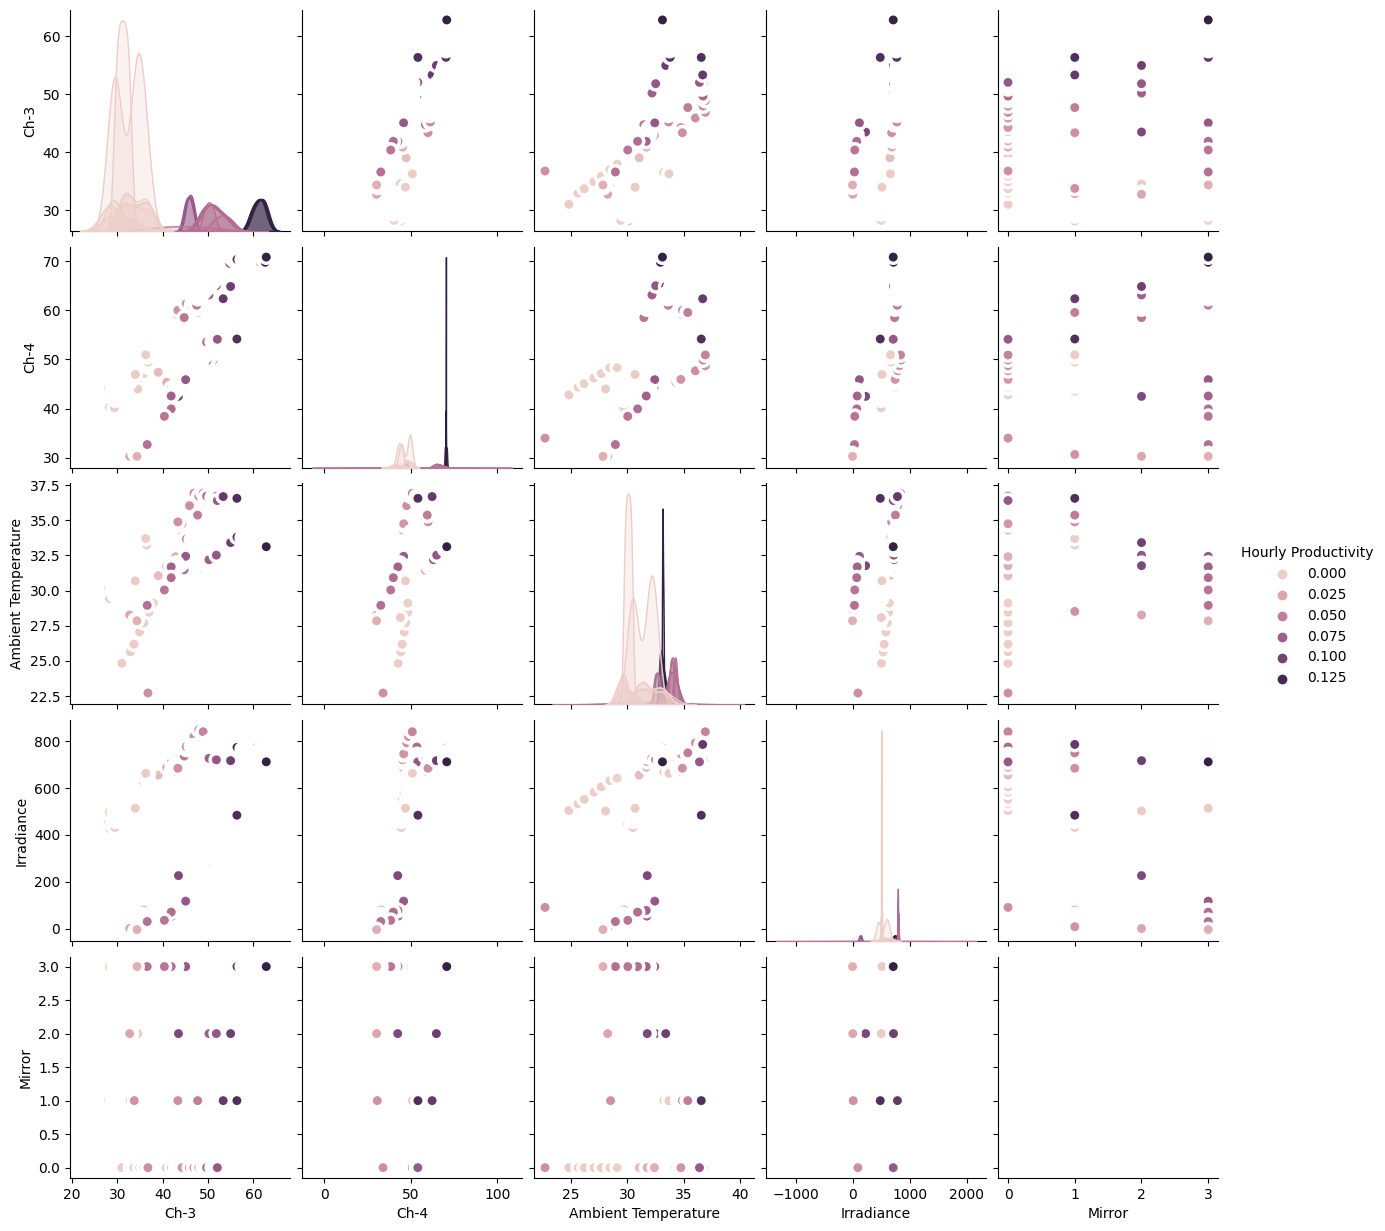

In [11]:
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(data, kind="scatter", hue="Hourly Productivity", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

In [11]:
from scipy.stats import variation
variation(data)

array([0.23033826, 0.23250322, 0.08591619, 0.49222109, 0.88568551,
       0.56128268])

### Linear Regression

In [13]:
X = data[['Ch-3','Ch-4','Ambient Temperature','Irradiance','Mirror']]
y = data['Hourly Productivity']

In [14]:
import sys
sys.path.append('C:/Users/91905/AppData/Local/Programs/Python/Python311/Lib/site-packages')

In [15]:
from  sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [17]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [18]:
model.coef_

array([ 4.68551368e-03, -2.11122990e-04, -8.79633742e-04, -4.26688935e-05,
        2.74170985e-03])

In [19]:
model.intercept_

-0.09805964345365563

In [20]:
y_pred_train = model.predict(X_train)

In [21]:
y_pred_test=model.predict(X_test)

In [22]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [23]:
print('Mean Absolute Error testing:',metrics.mean_absolute_error(y_test,y_pred_test))
print('Mean Squared Error testing:',metrics.mean_squared_error(y_test,y_pred_test))
print('Root Mean Squared Error testing:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))

Mean Absolute Error testing: 0.007579812623751511
Mean Squared Error testing: 8.977064769209714e-05
Root Mean Squared Error testing: 0.009474737341588798


In [24]:
print('Mean Absolute Error training:',metrics.mean_absolute_error(y_train,y_pred_train))
print('Mean Squared Error training:',metrics.mean_squared_error(y_train,y_pred_train))
print('Root Mean Squared Error training:',np.sqrt(metrics.mean_squared_error(y_train,y_pred_train)))

Mean Absolute Error training: 0.008427006585816483
Mean Squared Error training: 0.00011010938304872654
Root Mean Squared Error training: 0.01049330181824227


In [25]:
r2_testing = metrics.r2_score(y_test,y_pred_test)
r2_training = metrics.r2_score(y_train,y_pred_train)
print('R2 score training: ', metrics.r2_score(y_test,y_pred_test))

print('R2 score testing: ', metrics.r2_score(y_train,y_pred_train))

R2 score training:  0.9481547222841292
R2 score testing:  0.9374201525443134


In [26]:
Adjusted_R2_training = 1 - (1-r2_training)*(X_train.shape[0]-1)/(X_train.shape[0]-5-1)
Adjusted_R2_testing = 1 - (1-r2_testing)*(X_test.shape[0]-1)/(X_test.shape[0]-5-1)
print('Adjusted R2 score training : ', Adjusted_R2_training)
print('Adjusted R2 score testing : ', Adjusted_R2_testing)

Adjusted R2 score training :  0.9361833966657426
Adjusted R2 score testing :  0.9456858995357544


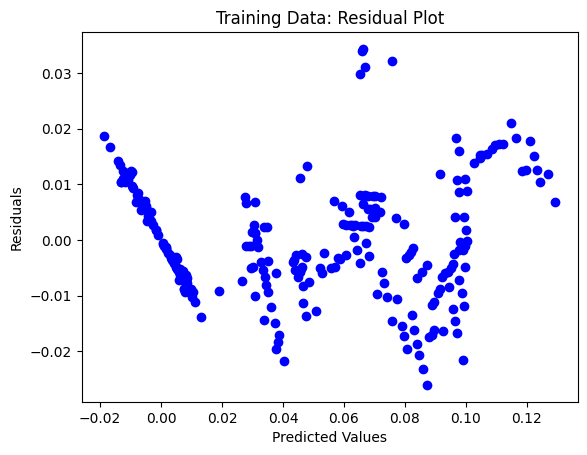

In [27]:
#Scatter for training data
# Residual plot for training data
plt.scatter(y_pred_train, y_train - y_pred_train, c='blue')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Training Data: Residual Plot")
plt.show()

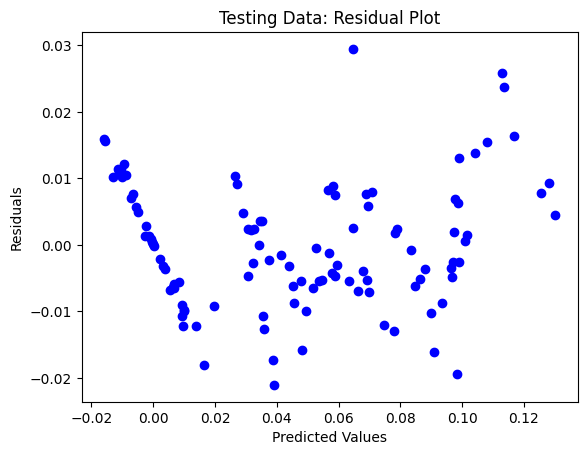

In [28]:
# Residual plot for testing data
plt.scatter(y_pred_test, y_test - y_pred_test, c='blue')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Testing Data: Residual Plot")
plt.show()

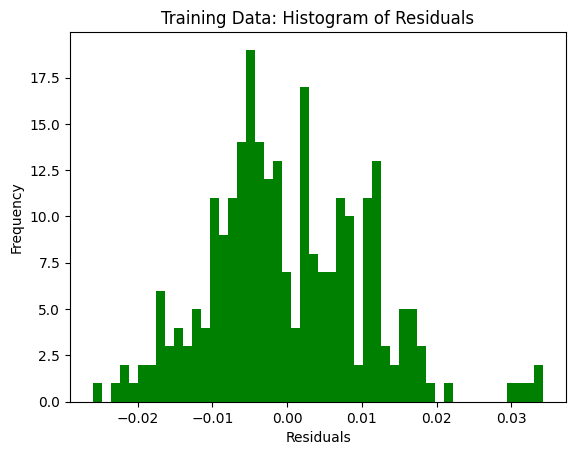

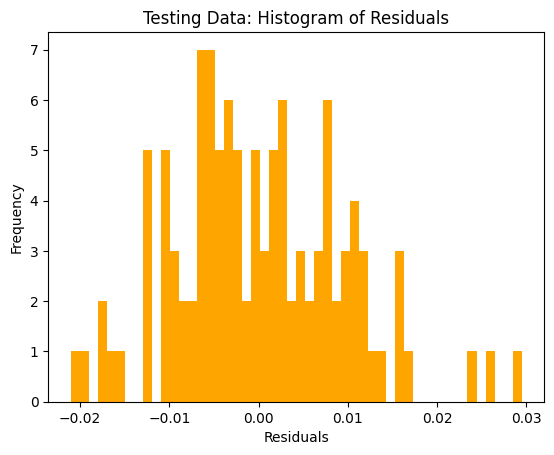

In [29]:
# Histogram of residuals for training data
plt.hist(y_train - y_pred_train, bins=50, color='green')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Training Data: Histogram of Residuals")
plt.show()

# Histogram of residuals for testing data
plt.hist(y_test - y_pred_test, bins=50, color='orange')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Testing Data: Histogram of Residuals")
plt.show()

In [30]:
import scipy

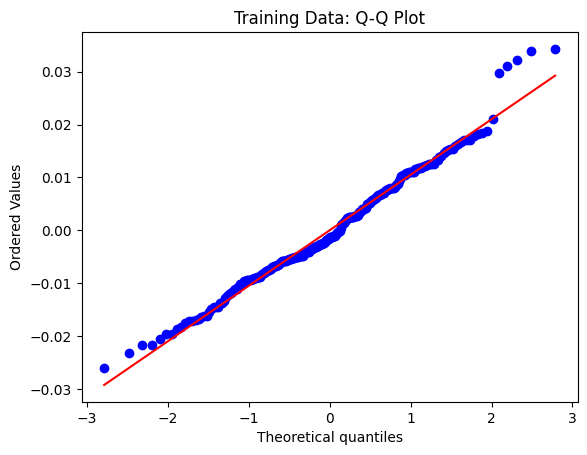

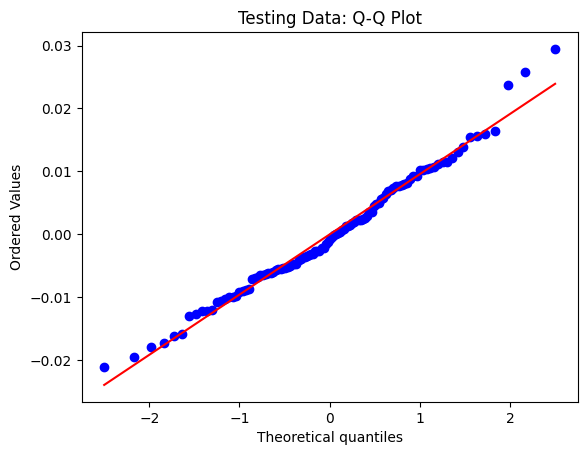

In [31]:
# Q-Q plot for training data
residuals_train = y_train - y_pred_train
scipy.stats.probplot(residuals_train, dist="norm", plot=plt)
plt.title("Training Data: Q-Q Plot")
plt.show()

# Q-Q plot for testing data
residuals_test = y_test - y_pred_test
scipy.stats.probplot(residuals_test, dist="norm", plot=plt)
plt.title("Testing Data: Q-Q Plot")
plt.show()

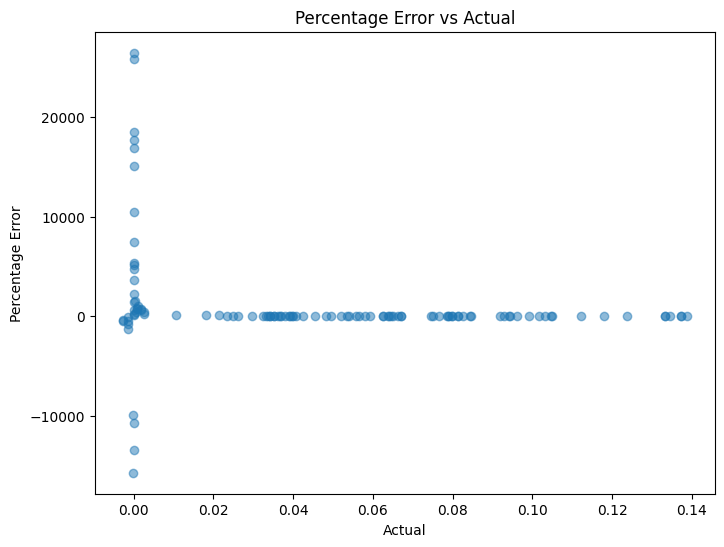

In [32]:
#percentage error graph
# calculate percentage error for testing data
percentage_error = 100 * np.abs(y_test - y_pred_test) / y_test

# plot percentage error
plt.figure(figsize=(8, 6))
plt.scatter(y_test, percentage_error, alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Percentage Error')
plt.title('Percentage Error vs Actual')
plt.show()

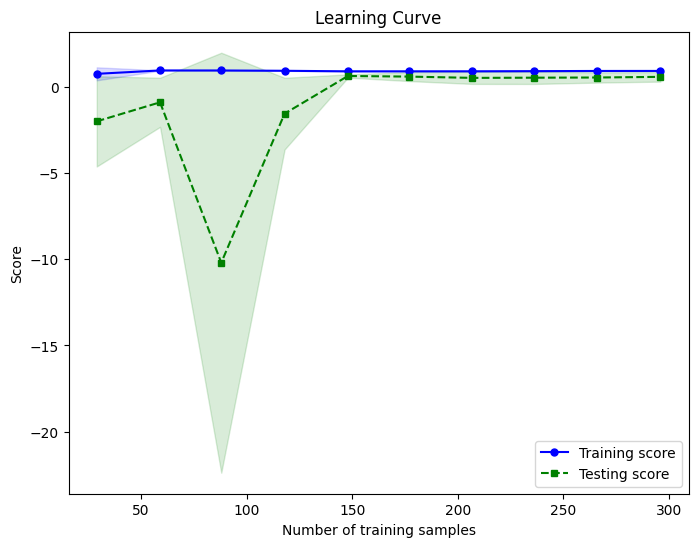

In [33]:
# # Learning curve
from sklearn.model_selection import learning_curve

# train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=10, scoring='neg_mean_squared_error')
# train_scores_mean = np.mean(-train_scores, axis=1)
# test_scores_mean = np.mean(-test_scores, axis=1)

# plt.plot(train_sizes, train_scores_mean, label='Training Error')
# plt.plot(train_sizes, test_scores_mean, label='Validation Error')
# plt.xlabel("Training Set Size")
# plt.ylabel("MSE")
# plt.title("Learning Curve")
# plt.legend()
# plt.show()

# assuming you have already defined your regression model as "model"
# and have loaded your dataset into "X" and "y"

# create learning curve with 5-fold cross-validation
train_sizes, train_scores, test_scores = learning_curve(
    estimator=model, X=X, y=y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# calculate mean and standard deviation of training and testing scores across folds
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Testing score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Number of training samples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='lower right')
plt.show()


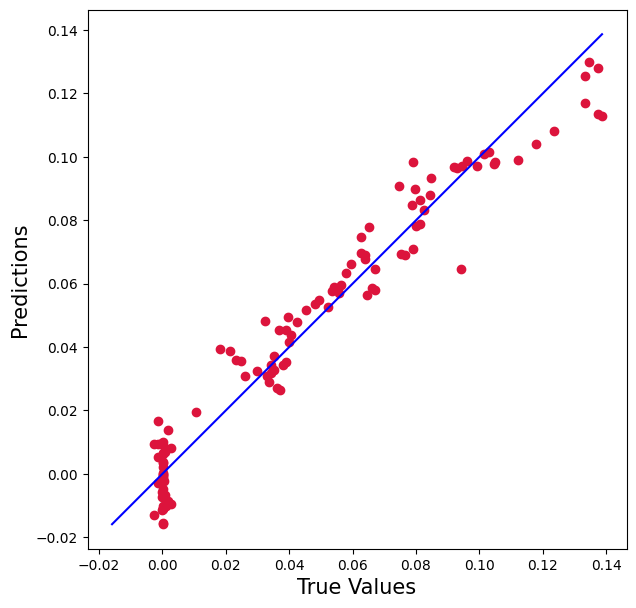

In [34]:
from matplotlib import pyplot as plt

plt.figure(figsize=(7,7))
plt.scatter(y_test,y_pred_test,c='crimson')

p1 = min(min(y_pred_test),min(y_test))
p2 = max(max(y_pred_test),max(y_test))
plt.plot([p1,p2],[p1,p2],'b-')
plt.xlabel('True Values', fontsize = 15)
plt.ylabel('Predictions', fontsize = 15)
plt.axis('equal')
plt.axis('square')
plt.show()


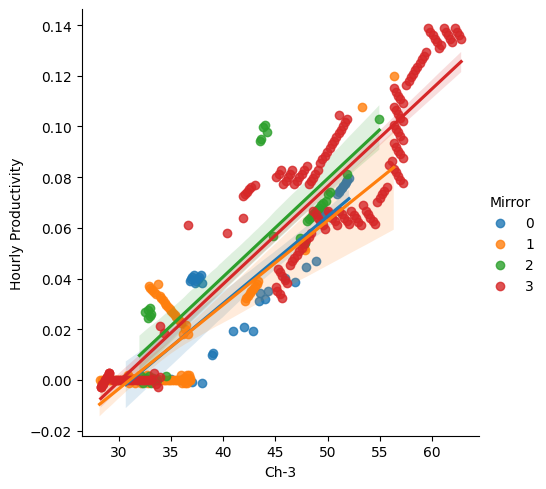

In [35]:
import seaborn as sns
g = sns.lmplot(x='Ch-3', y='Hourly Productivity',data = data,hue='Mirror')

### Decision Tree Regression

In [36]:
X = data[['Ch-3','Ch-4','Ambient Temperature','Irradiance','Mirror']]
y = data['Hourly Productivity']

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [38]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(criterion="friedman_mse",
                           max_depth=10,
                            min_samples_split=5,
                           random_state=5)

In [39]:
reg.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=10,
                      min_samples_split=5, random_state=5)

In [40]:
y_pred_test = reg.predict(X_test)

In [41]:
y_pred_train = reg.predict(X_train)

In [42]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred_test)

3.375934597121272e-05

In [43]:
print('Mean Absolute Error testing:',metrics.mean_absolute_error(y_test,y_pred_test))
print('Mean Squared Error testing:',metrics.mean_squared_error(y_test,y_pred_test))
print('Root Mean Squared Error testing:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))

Mean Absolute Error testing: 0.0025647004417770096
Mean Squared Error testing: 3.375934597121272e-05
Root Mean Squared Error testing: 0.005810279336762796


In [44]:
print('Mean Absolute Error training:',metrics.mean_absolute_error(y_train,y_pred_train))
print('Mean Squared Error training:',metrics.mean_squared_error(y_train,y_pred_train))
print('Root Mean Squared Error training:',np.sqrt(metrics.mean_squared_error(y_train,y_pred_train)))

Mean Absolute Error training: 0.00101314342196406
Mean Squared Error training: 3.0012037545274424e-06
Root Mean Squared Error training: 0.0017323982667179745


In [45]:
r2_testing = metrics.r2_score(y_test,y_pred_test)
r2_training = metrics.r2_score(y_train,y_pred_train)
print('R2 score training: ', metrics.r2_score(y_test,y_pred_test))
print('R2 score testing: ', metrics.r2_score(y_train,y_pred_train))

Adjusted_R2_training = 1 - (1-r2_training)*(X_train.shape[0]-1)/(X_train.shape[0]-5-1)
Adjusted_R2_testing = 1 - (1-r2_testing)*(X_test.shape[0]-1)/(X_test.shape[0]-5-1)
print('Adjusted R2 score training : ', Adjusted_R2_training)
print('Adjusted R2 score testing : ', Adjusted_R2_testing)

R2 score training:  0.980502951550635
R2 score testing:  0.9982942882074033
Adjusted R2 score training :  0.9982605784881821
Adjusted R2 score testing :  0.9795745206720938


In [46]:
from sklearn import tree
text_representation = tree.export_text(reg)
print(text_representation)

|--- feature_0 <= 42.05
|   |--- feature_3 <= 274.57
|   |   |--- feature_0 <= 36.53
|   |   |   |--- feature_3 <= 57.79
|   |   |   |   |--- feature_2 <= 28.35
|   |   |   |   |   |--- value: [0.02]
|   |   |   |   |--- feature_2 >  28.35
|   |   |   |   |   |--- feature_1 <= 31.60
|   |   |   |   |   |   |--- feature_4 <= 1.50
|   |   |   |   |   |   |   |--- feature_2 <= 28.95
|   |   |   |   |   |   |   |   |--- value: [0.04]
|   |   |   |   |   |   |   |--- feature_2 >  28.95
|   |   |   |   |   |   |   |   |--- value: [0.03]
|   |   |   |   |   |   |--- feature_4 >  1.50
|   |   |   |   |   |   |   |--- value: [0.03]
|   |   |   |   |   |--- feature_1 >  31.60
|   |   |   |   |   |   |--- feature_3 <= 47.09
|   |   |   |   |   |   |   |--- value: [0.03]
|   |   |   |   |   |   |--- feature_3 >  47.09
|   |   |   |   |   |   |   |--- value: [0.03]
|   |   |   |--- feature_3 >  57.79
|   |   |   |   |--- feature_1 <= 33.25
|   |   |   |   |   |--- value: [0.02]
|   |   |   |   |---

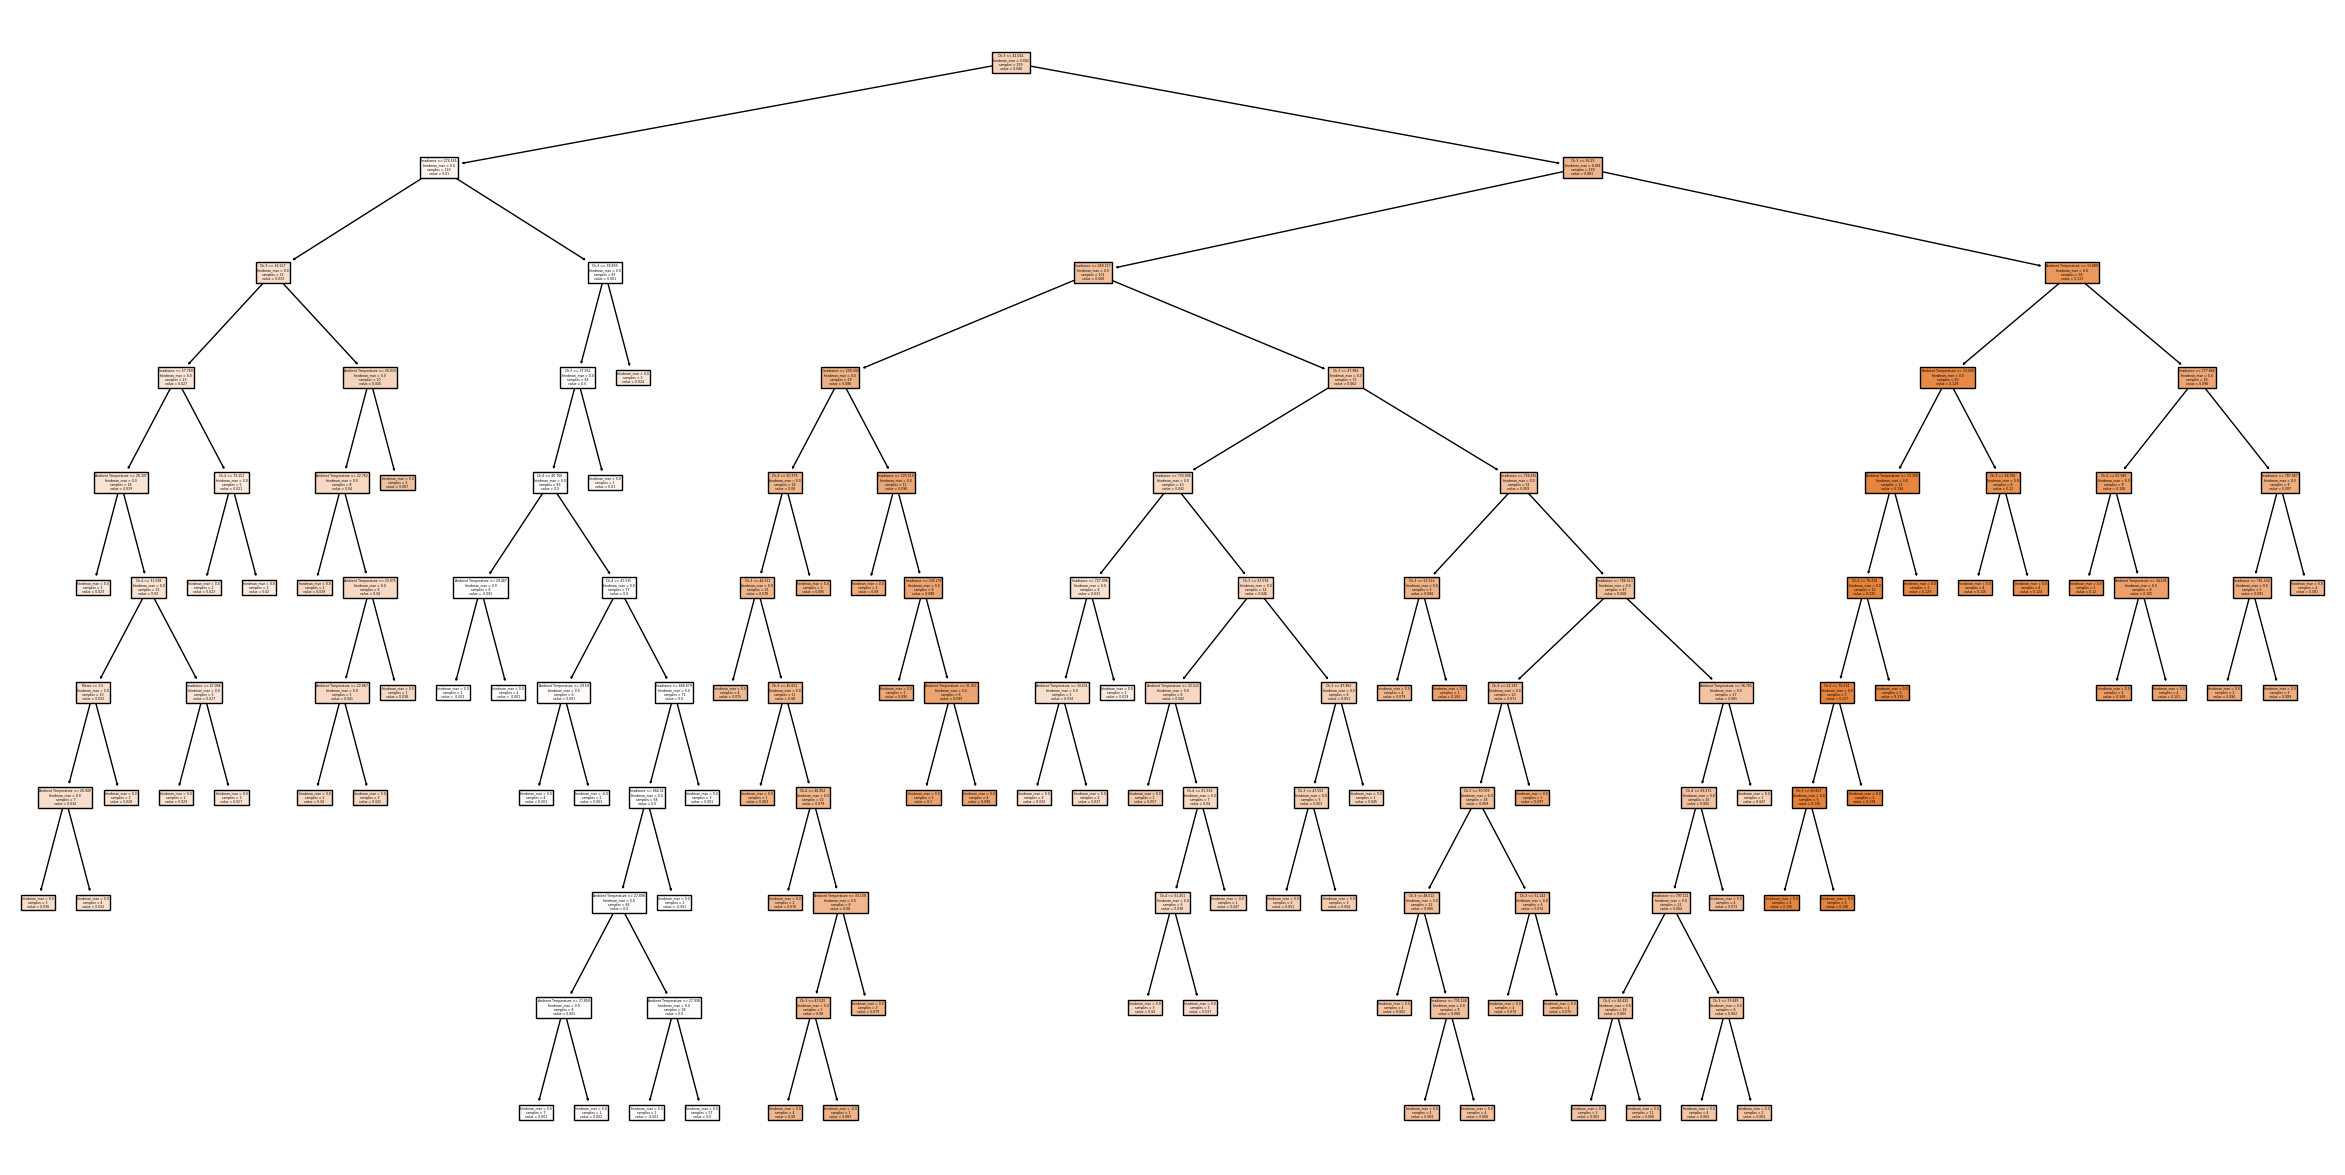

In [47]:
fig = plt.figure(figsize=(30,15))
_ = tree.plot_tree(reg, feature_names=X.columns, filled=True)

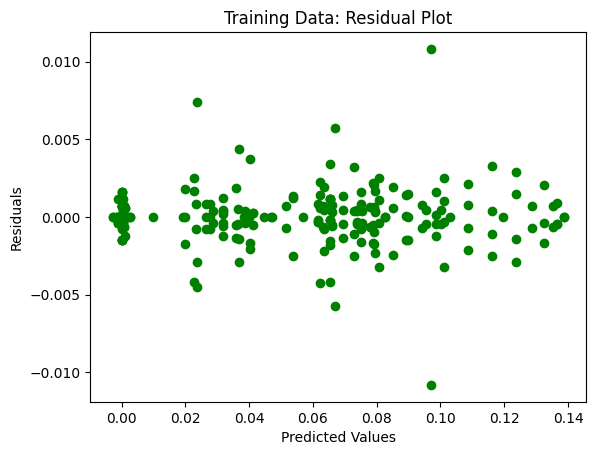

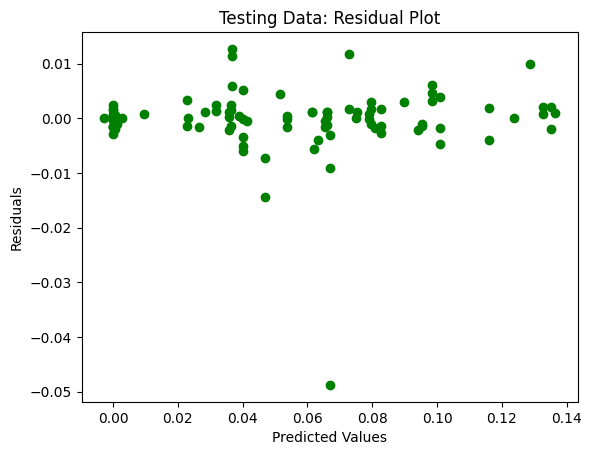

In [48]:
#Scatter for training data
# Residual plot for training data
plt.scatter(y_pred_train, y_train - y_pred_train, c='green')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Training Data: Residual Plot")
plt.show()

# Residual plot for testing data
plt.scatter(y_pred_test, y_test - y_pred_test, c='green')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Testing Data: Residual Plot")
plt.show()

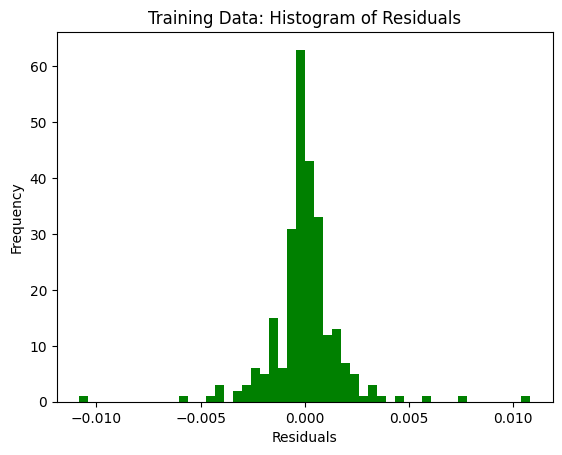

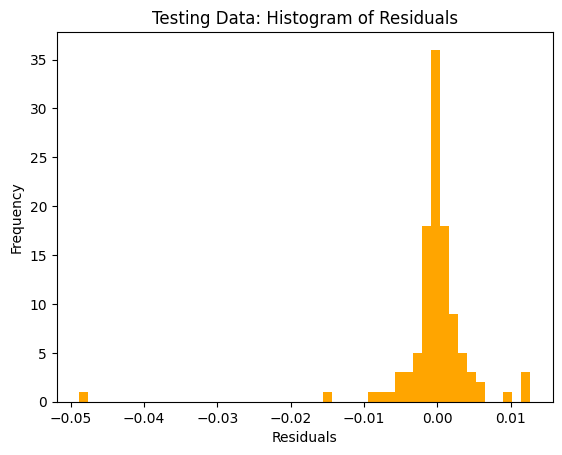

In [49]:
# Histogram of residuals for training data
plt.hist(y_train - y_pred_train, bins=50, color='green')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Training Data: Histogram of Residuals")
plt.show()

# Histogram of residuals for testing data
plt.hist(y_test - y_pred_test, bins=50, color='orange')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Testing Data: Histogram of Residuals")
plt.show()

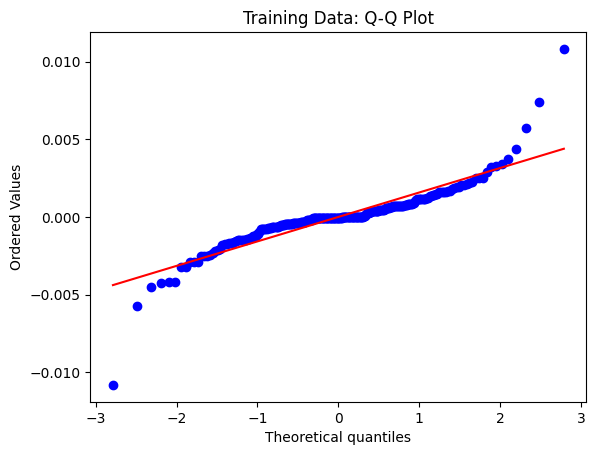

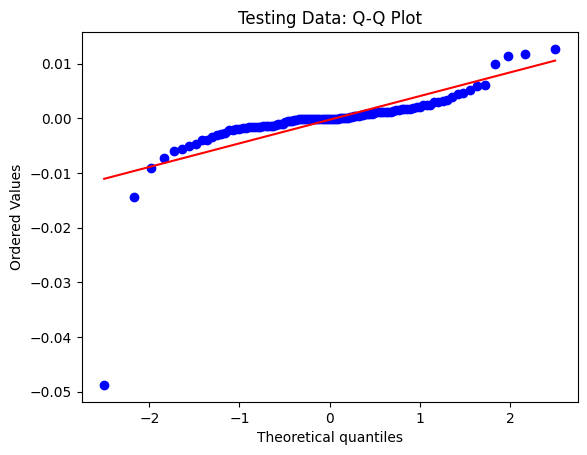

In [50]:
# Q-Q plot for training data
residuals_train = y_train - y_pred_train
scipy.stats.probplot(residuals_train, dist="norm", plot=plt)
plt.title("Training Data: Q-Q Plot")
plt.show()

# Q-Q plot for testing data
residuals_test = y_test - y_pred_test
scipy.stats.probplot(residuals_test, dist="norm", plot=plt)
plt.title("Testing Data: Q-Q Plot")
plt.show()

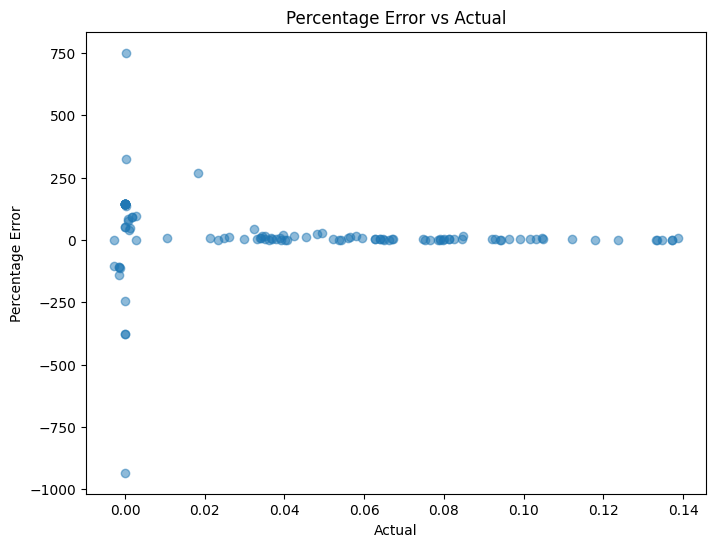

In [51]:
#percentage error graph
# calculate percentage error for testing data
percentage_error = 100 * np.abs(y_test - y_pred_test) / y_test

# plot percentage error
plt.figure(figsize=(8, 6))
plt.scatter(y_test, percentage_error, alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Percentage Error')
plt.title('Percentage Error vs Actual')
plt.show()

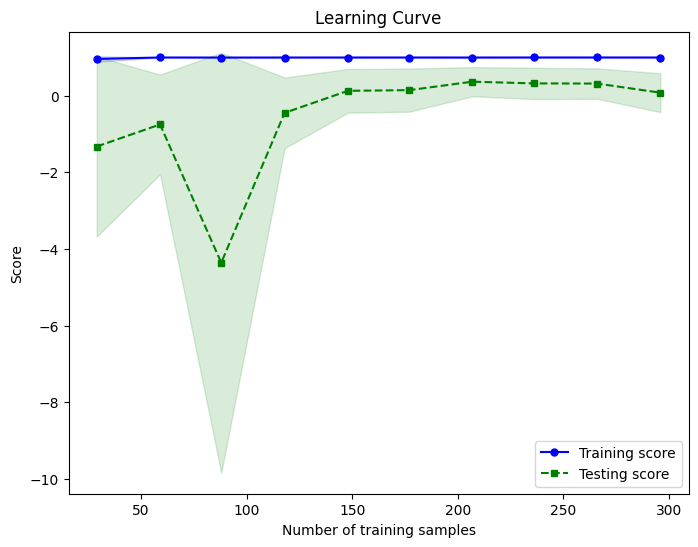

In [52]:
# # Learning curve
# from sklearn.model_selection import learning_curve

# train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=10, scoring='neg_mean_squared_error')
# train_scores_mean = np.mean(-train_scores, axis=1)
# test_scores_mean = np.mean(-test_scores, axis=1)

# plt.plot(train_sizes, train_scores_mean, label='Training Error')
# plt.plot(train_sizes, test_scores_mean, label='Validation Error')
# plt.xlabel("Training Set Size")
# plt.ylabel("MSE")
# plt.title("Learning Curve")
# plt.legend()
# plt.show()

# assuming you have already defined your regression model as "model"
# and have loaded your dataset into "X" and "y"

# create learning curve with 5-fold cross-validation
train_sizes, train_scores, test_scores = learning_curve(
    estimator=reg, X=X, y=y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# calculate mean and standard deviation of training and testing scores across folds
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Testing score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Number of training samples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='lower right')
plt.show()


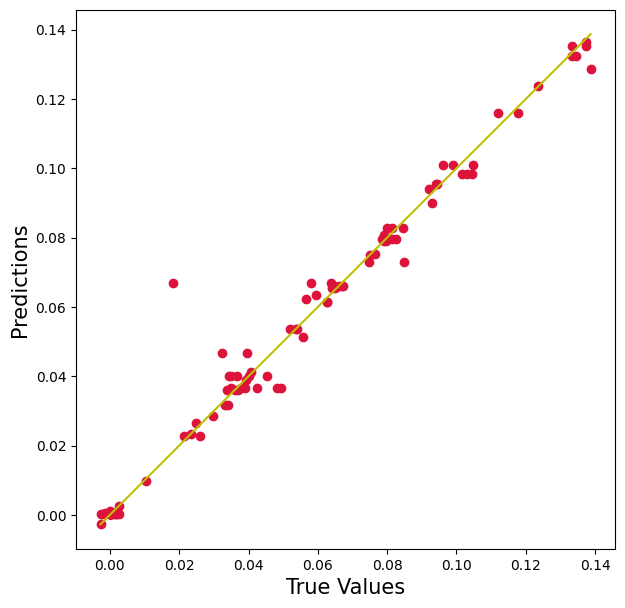

In [53]:
from matplotlib import pyplot as plt

plt.figure(figsize=(7,7))
plt.scatter(y_test,y_pred_test,c='crimson')

p1 = min(min(y_pred_test),min(y_test))
p2 = max(max(y_pred_test),max(y_test))
plt.plot([p1,p2],[p1,p2],'y-')
plt.xlabel('True Values', fontsize = 15)
plt.ylabel('Predictions', fontsize = 15)
plt.axis('equal')
plt.axis('square')
plt.show()


### Random Forest Regression

In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [55]:
X = data[['Ch-3','Ch-4','Ambient Temperature','Irradiance','Mirror']]
y = data['Hourly Productivity']

In [56]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [57]:
rf = RandomForestRegressor(n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', max_depth=20, bootstrap=True, random_state=42)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=1000,
                      random_state=42)

In [58]:
y_pred_test = rf.predict(X_test)
y_pred_train = rf.predict(X_train)

In [59]:
from sklearn.metrics import mean_squared_error,r2_score
mean_squared_error(y_test,y_pred_test)

1.4317650192031158e-05

In [60]:
print('Mean Absolute Error testing:',metrics.mean_absolute_error(y_test,y_pred_test))
print('Mean Squared Error testing:',metrics.mean_squared_error(y_test,y_pred_test))
print('Root Mean Squared Error testing:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))
print()
print()
print('Mean Absolute Error training:',metrics.mean_absolute_error(y_train,y_pred_train))
print('Mean Squared Error training:',metrics.mean_squared_error(y_train,y_pred_train))
print('Root Mean Squared Error training:',np.sqrt(metrics.mean_squared_error(y_train,y_pred_train)))

Mean Absolute Error testing: 0.002226621872403176
Mean Squared Error testing: 1.4317650192031158e-05
Root Mean Squared Error testing: 0.0037838670949216966


Mean Absolute Error training: 0.0010083489124807544
Mean Squared Error training: 4.9194403274228195e-06
Root Mean Squared Error training: 0.002217981137751811


In [61]:
r2_testing = metrics.r2_score(y_test,y_pred_test)
r2_training = metrics.r2_score(y_train,y_pred_train)
print('R2 score training: ', metrics.r2_score(y_test,y_pred_test))
print('R2 score testing: ', metrics.r2_score(y_train,y_pred_train))

Adjusted_R2_training = 1 - (1-r2_training)*(X_train.shape[0]-1)/(X_train.shape[0]-5-1)
Adjusted_R2_testing = 1 - (1-r2_testing)*(X_test.shape[0]-1)/(X_test.shape[0]-5-1)
print('Adjusted R2 score training : ', Adjusted_R2_training)
print('Adjusted R2 score testing : ', Adjusted_R2_testing)

R2 score training:  0.9917311218139969
R2 score testing:  0.9972040727435442
Adjusted R2 score training :  0.9971488172641676
Adjusted R2 score testing :  0.9913373657099015


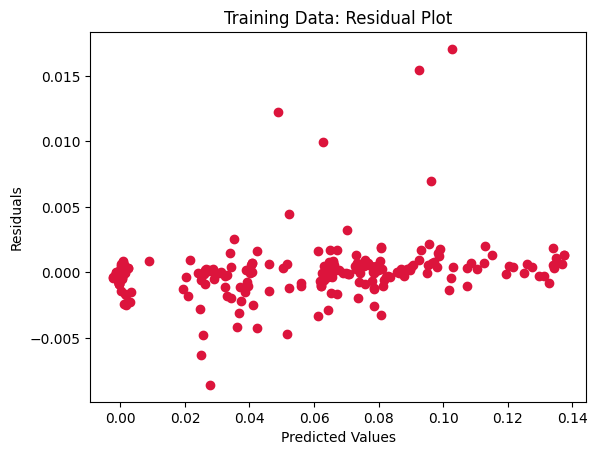

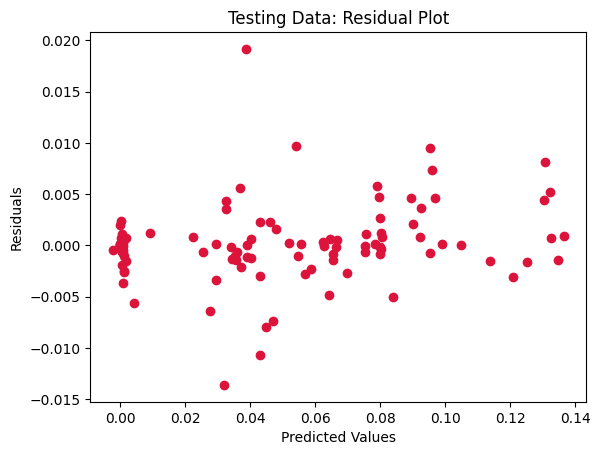

In [62]:
#Scatter for training data
# Residual plot for training data
plt.scatter(y_pred_train, y_train - y_pred_train, c='crimson')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Training Data: Residual Plot")
plt.show()

# Residual plot for testing data
plt.scatter(y_pred_test, y_test - y_pred_test, c='crimson')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Testing Data: Residual Plot")
plt.show()

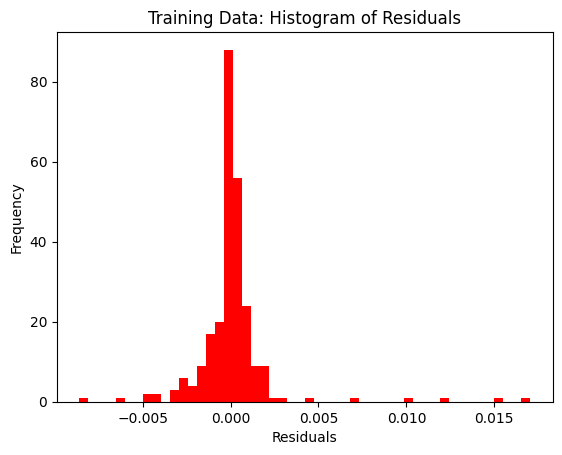

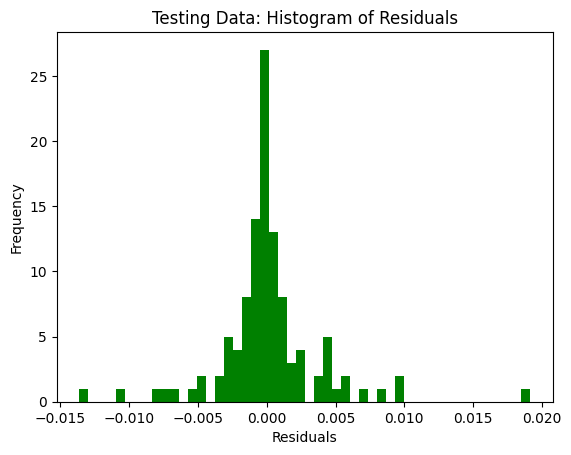

In [63]:
# Histogram of residuals for training data
plt.hist(y_train - y_pred_train, bins=50, color='red')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Training Data: Histogram of Residuals")
plt.show()

# Histogram of residuals for testing data
plt.hist(y_test - y_pred_test, bins=50, color='green')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Testing Data: Histogram of Residuals")
plt.show()

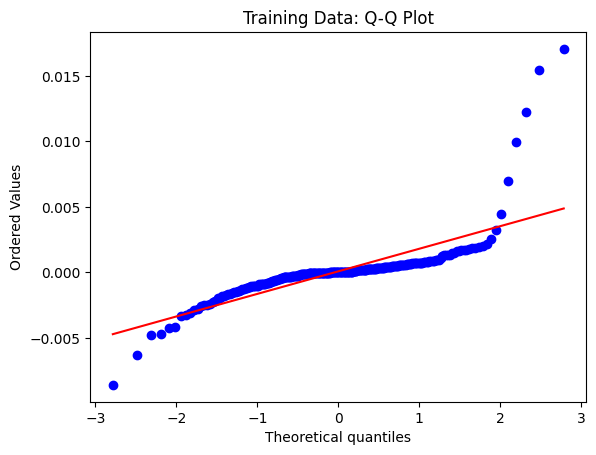

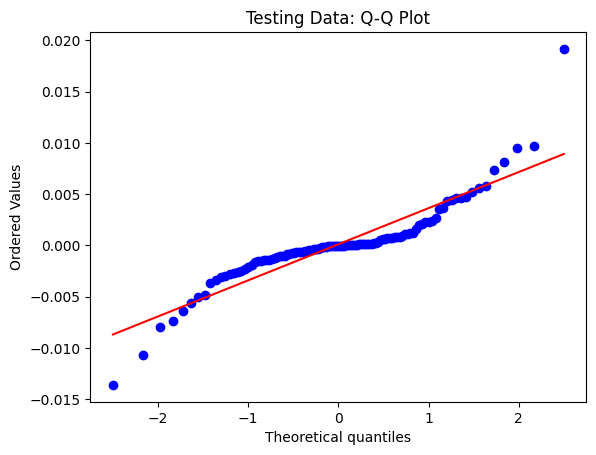

In [64]:
# Q-Q plot for training data
residuals_train = y_train - y_pred_train
scipy.stats.probplot(residuals_train, dist="norm", plot=plt)
plt.title("Training Data: Q-Q Plot")
plt.show()

# Q-Q plot for testing data
residuals_test = y_test - y_pred_test
scipy.stats.probplot(residuals_test, dist="norm", plot=plt)
plt.title("Testing Data: Q-Q Plot")
plt.show()

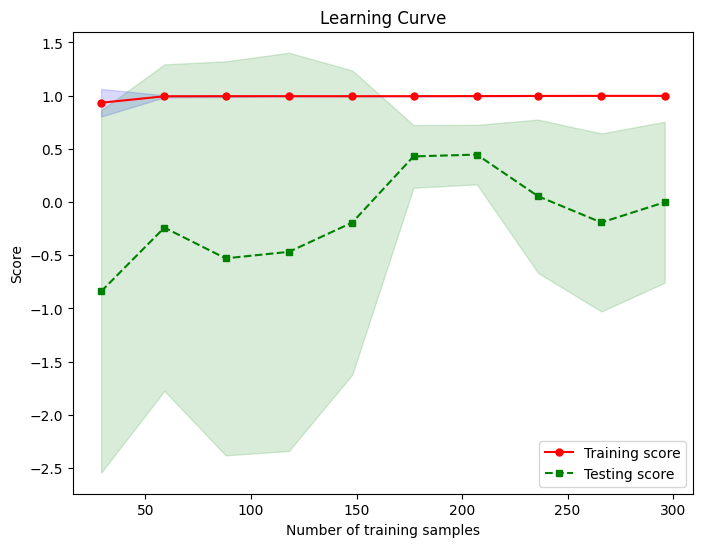

In [65]:
# create learning curve with 5-fold cross-validation
train_sizes, train_scores, test_scores = learning_curve(
    estimator=rf, X=X, y=y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# calculate mean and standard deviation of training and testing scores across folds
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, color='red', marker='o', markersize=5, label='Training score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Testing score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Number of training samples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='lower right')
plt.show()


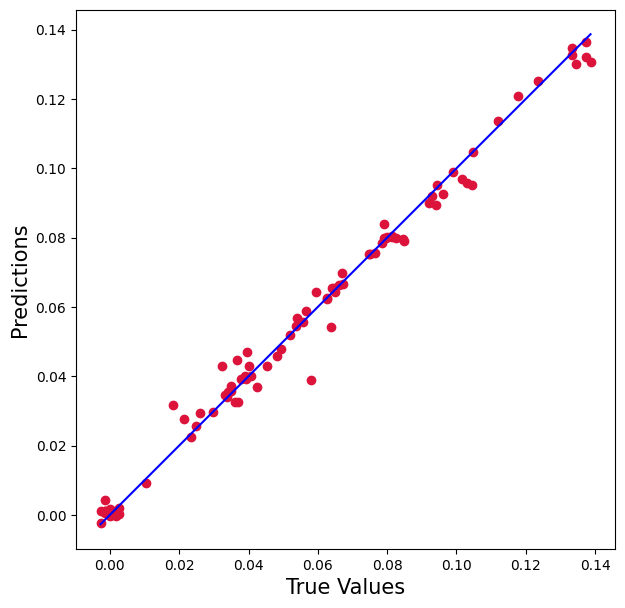

In [66]:
from matplotlib import pyplot as plt

plt.figure(figsize=(7,7))
plt.scatter(y_test,y_pred_test,c='crimson')

p1 = min(min(y_pred_test),min(y_test))
p2 = max(max(y_pred_test),max(y_test))
plt.plot([p1,p2],[p1,p2],'b-')
plt.xlabel('True Values', fontsize = 15)
plt.ylabel('Predictions', fontsize = 15)
plt.axis('equal')
plt.axis('square')
plt.show()


### Gradient Boosting

In [51]:
from sklearn.ensemble import GradientBoostingRegressor

In [52]:
data

,T_water,T_inside_glass,Ambient_Temperature,Irradiance,Hourly_Productivity,Mirror
0,30.648048,42.261090,24.836431,503.677883,0.000942,0
1,31.019030,42.782960,24.825085,503.673230,0.000941,0
2,32.918222,44.330141,25.642509,532.695245,0.000243,0
3,33.708846,45.065131,26.182776,551.631701,0.000239,0
4,34.940351,46.238222,27.049364,581.997313,0.000233,0
...,...,...,...,...,...,...
365,41.891860,39.947029,30.913158,70.969142,0.063867,3
366,40.388037,38.439829,30.041238,36.133406,0.057933,3
367,36.602992,32.702559,28.946861,30.825743,0.061245,3
368,33.955826,30.865614,27.894147,-9.384841,0.021329,3


In [53]:
X = data[['T_water','T_inside_glass','Ambient_Temperature','Irradiance','Mirror']]
y = data['Hourly_Productivity']

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [55]:
gb = GradientBoostingRegressor(random_state=42)

In [56]:
gb.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [57]:
import pickle
pickle.dump(gb, open('./model.sav', 'wb'))

In [58]:
y_pred_test = gb.predict(X_test)
y_pred_train = gb.predict(X_train)

In [59]:
from sklearn import metrics
print('Mean Absolute Error testing:',metrics.mean_absolute_error(y_test,y_pred_test))
print('Mean Squared Error testing:',metrics.mean_squared_error(y_test,y_pred_test))
print('Root Mean Squared Error testing:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))
print()
print()
print('Mean Absolute Error training:',metrics.mean_absolute_error(y_train,y_pred_train))
print('Mean Squared Error training:',metrics.mean_squared_error(y_train,y_pred_train))
print('Root Mean Squared Error training:',np.sqrt(metrics.mean_squared_error(y_train,y_pred_train)))

Mean Absolute Error testing: 0.002210175871861948
Mean Squared Error testing: 1.3758359967594031e-05
Root Mean Squared Error testing: 0.0037092263300577966


Mean Absolute Error training: 0.0011234306771303604
Mean Squared Error training: 2.506805461345937e-06
Root Mean Squared Error training: 0.001583289443325489


In [60]:
r2_testing = metrics.r2_score(y_test,y_pred_test)
r2_training = metrics.r2_score(y_train,y_pred_train)
print('R2 score training: ', metrics.r2_score(y_test,y_pred_test))
print('R2 score testing: ', metrics.r2_score(y_train,y_pred_train))

Adjusted_R2_training = 1 - (1-r2_training)*(X_train.shape[0]-1)/(X_train.shape[0]-5-1)
Adjusted_R2_testing = 1 - (1-r2_testing)*(X_test.shape[0]-1)/(X_test.shape[0]-5-1)
print('Adjusted R2 score training : ', Adjusted_R2_training)
print('Adjusted R2 score testing : ', Adjusted_R2_testing)

R2 score training:  0.9920541289188267
R2 score testing:  0.9985752757936833
Adjusted R2 score training :  0.9985471191888154
Adjusted R2 score testing :  0.9916757541054375


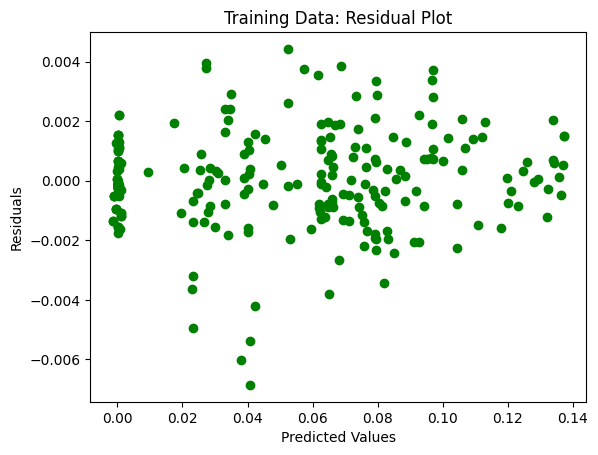

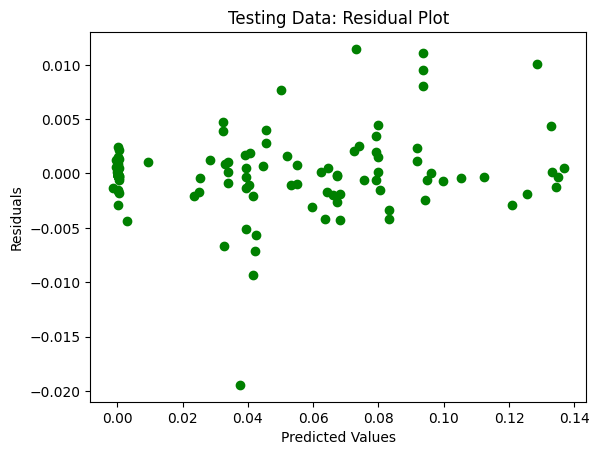

In [75]:
#Scatter for training data
# Residual plot for training data
plt.scatter(y_pred_train, y_train - y_pred_train, c='green')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Training Data: Residual Plot")
plt.show()

# Residual plot for testing data
plt.scatter(y_pred_test, y_test - y_pred_test, c='green')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Testing Data: Residual Plot")
plt.show()

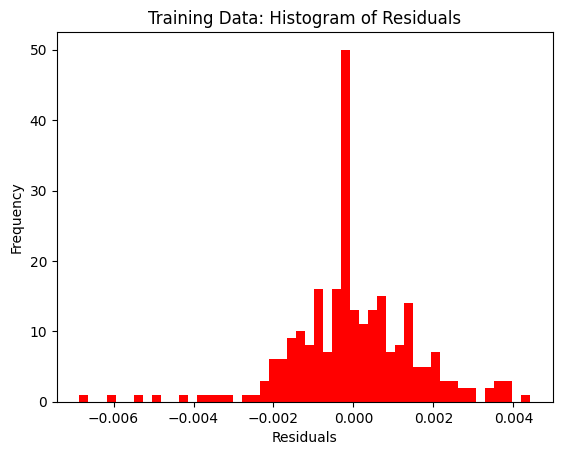

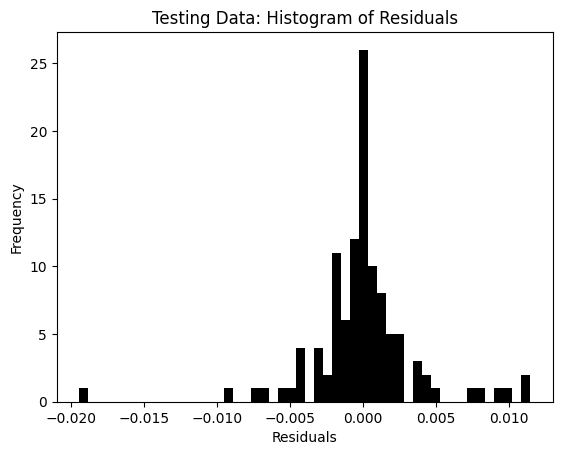

In [76]:
# Histogram of residuals for training data
plt.hist(y_train - y_pred_train, bins=50, color='red')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Training Data: Histogram of Residuals")
plt.show()

# Histogram of residuals for testing data
plt.hist(y_test - y_pred_test, bins=50, color='black')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Testing Data: Histogram of Residuals")
plt.show()

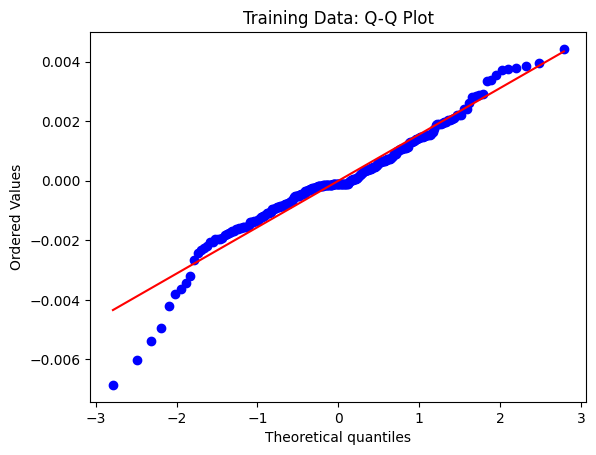

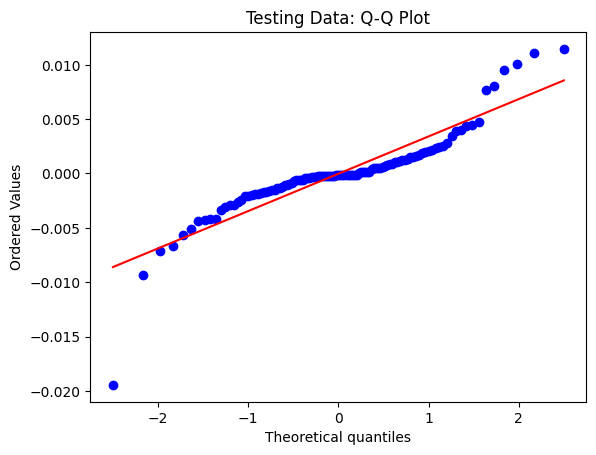

In [77]:
# Q-Q plot for training data
residuals_train = y_train - y_pred_train
scipy.stats.probplot(residuals_train, dist="norm", plot=plt)
plt.title("Training Data: Q-Q Plot")
plt.show()

# Q-Q plot for testing data
residuals_test = y_test - y_pred_test
scipy.stats.probplot(residuals_test, dist="norm", plot=plt)
plt.title("Testing Data: Q-Q Plot")
plt.show()

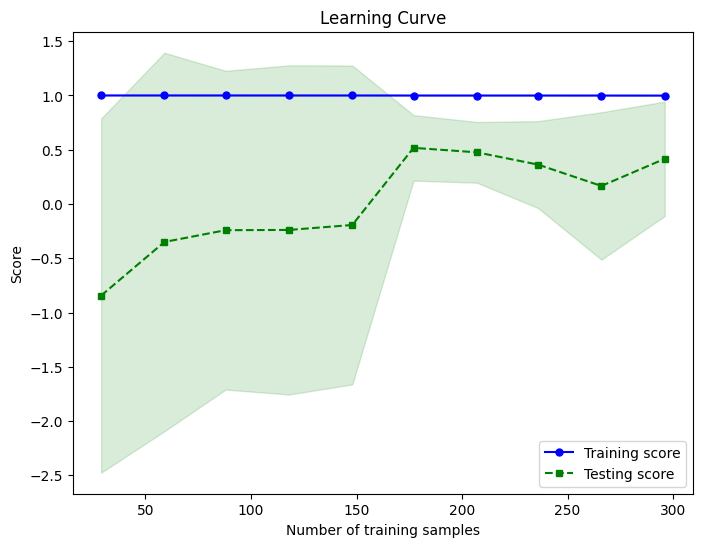

In [78]:
# # Learning curve
# from sklearn.model_selection import learning_curve

# train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=10, scoring='neg_mean_squared_error')
# train_scores_mean = np.mean(-train_scores, axis=1)
# test_scores_mean = np.mean(-test_scores, axis=1)

# plt.plot(train_sizes, train_scores_mean, label='Training Error')
# plt.plot(train_sizes, test_scores_mean, label='Validation Error')
# plt.xlabel("Training Set Size")
# plt.ylabel("MSE")
# plt.title("Learning Curve")
# plt.legend()
# plt.show()

# assuming you have already defined your regression model as "model"
# and have loaded your dataset into "X" and "y"

# create learning curve with 5-fold cross-validation
train_sizes, train_scores, test_scores = learning_curve(
    estimator=gb, X=X, y=y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# calculate mean and standard deviation of training and testing scores across folds
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# plot learning curve
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Testing score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Number of training samples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='lower right')
plt.show()


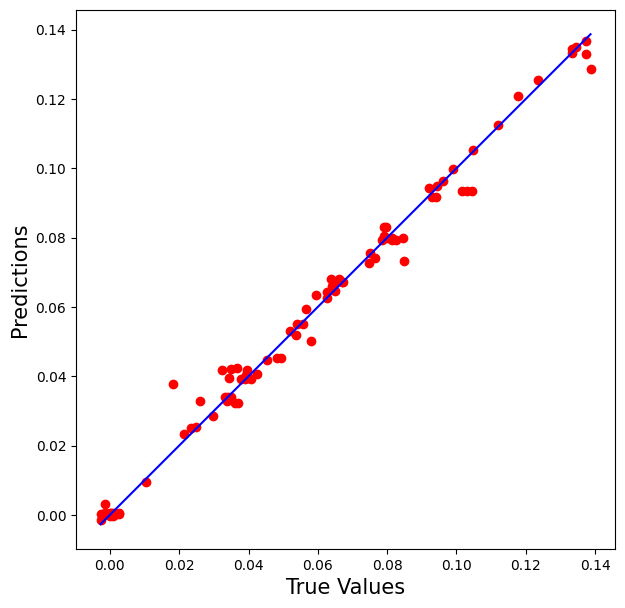

In [79]:
from matplotlib import pyplot as plt

plt.figure(figsize=(7,7))
plt.scatter(y_test,y_pred_test,c='red')

p1 = min(min(y_pred_test),min(y_test))
p2 = max(max(y_pred_test),max(y_test))
plt.plot([p1,p2],[p1,p2],'b-')
plt.xlabel('True Values', fontsize = 15)
plt.ylabel('Predictions', fontsize = 15)
plt.axis('equal')
plt.axis('square')
plt.show()


### Support Vector Regression

In [80]:
scaled_data = (data - data.min()) / (data.max() - data.min())

In [81]:
scaled_data.head()

,Ch-3,Ch-4,Ambient Temperature,Irradiance,Hourly Productivity,Mirror
0,0.072364,0.299439,0.155367,0.599081,0.025795,0.0
1,0.083061,0.312215,0.154574,0.599075,0.025789,0.0
2,0.137822,0.350093,0.211706,0.632963,0.020855,0.0
3,0.160618,0.368087,0.249467,0.655074,0.020826,0.0
4,0.196127,0.396807,0.310035,0.690531,0.020780,0.0


In [82]:
X = scaled_data[['Ch-3','Ch-4','Ambient Temperature','Irradiance','Mirror']]
y = scaled_data['Hourly Productivity']

In [83]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [84]:
from sklearn import svm

In [85]:
svr = svm.SVR()

In [86]:
svr.fit(X_train,y_train)

SVR()

In [87]:
y_pred_test = svr.predict(X_test)
y_pred_train = svr.predict(X_train)

In [88]:
print('Mean Absolute Error testing:',metrics.mean_absolute_error(y_test,y_pred_test))
print('Mean Squared Error testing:',metrics.mean_squared_error(y_test,y_pred_test))
print('Root Mean Squared Error testing:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))
print()
print()
print('Mean Absolute Error training:',metrics.mean_absolute_error(y_train,y_pred_train))
print('Mean Squared Error training:',metrics.mean_squared_error(y_train,y_pred_train))
print('Root Mean Squared Error training:',np.sqrt(metrics.mean_squared_error(y_train,y_pred_train)))

Mean Absolute Error testing: 0.056716683335250095
Mean Squared Error testing: 0.004183151662524917
Root Mean Squared Error testing: 0.06467728861451226


Mean Absolute Error training: 0.06062622205575938
Mean Squared Error training: 0.0044957001225381455
Root Mean Squared Error training: 0.06704998227097562


In [89]:
r2_testing = metrics.r2_score(y_test,y_pred_test)
r2_training = metrics.r2_score(y_train,y_pred_train)
print('R2 score training: ', metrics.r2_score(y_test,y_pred_test))
print('R2 score testing: ', metrics.r2_score(y_train,y_pred_train))

Adjusted_R2_training = 1 - (1-r2_training)*(X_train.shape[0]-1)/(X_train.shape[0]-5-1)
Adjusted_R2_testing = 1 - (1-r2_testing)*(X_test.shape[0]-1)/(X_test.shape[0]-5-1)
print('Adjusted R2 score training : ', Adjusted_R2_training)
print('Adjusted R2 score testing : ', Adjusted_R2_testing)

R2 score training:  0.9516939933035962
R2 score testing:  0.9489106725197927
Adjusted R2 score training :  0.9479010020162313
Adjusted R2 score testing :  0.949393707270434


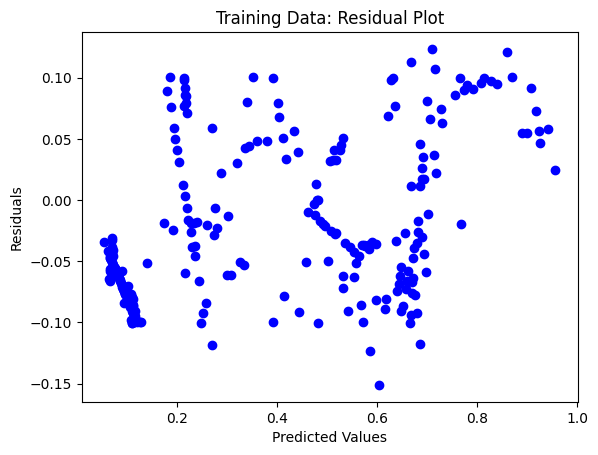

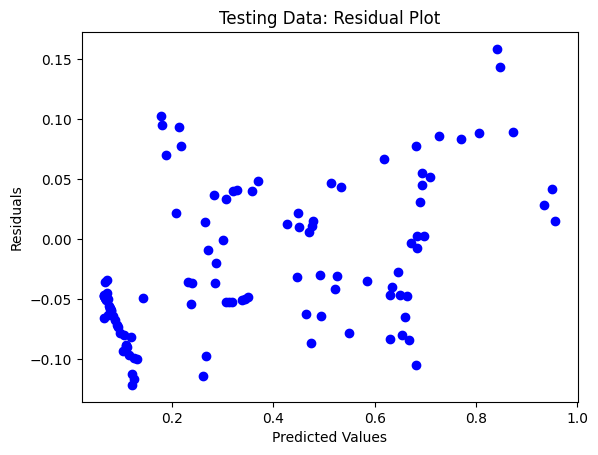

In [90]:
#Scatter for training data
# Residual plot for training data
plt.scatter(y_pred_train, y_train - y_pred_train, c='blue')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Training Data: Residual Plot")
plt.show()

# Residual plot for testing data
plt.scatter(y_pred_test, y_test - y_pred_test, c='blue')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Testing Data: Residual Plot")
plt.show()

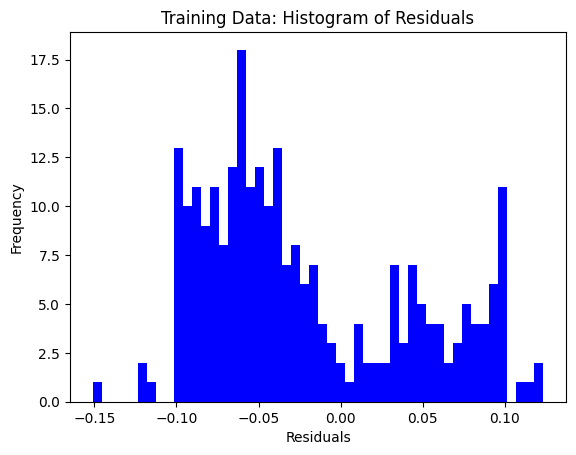

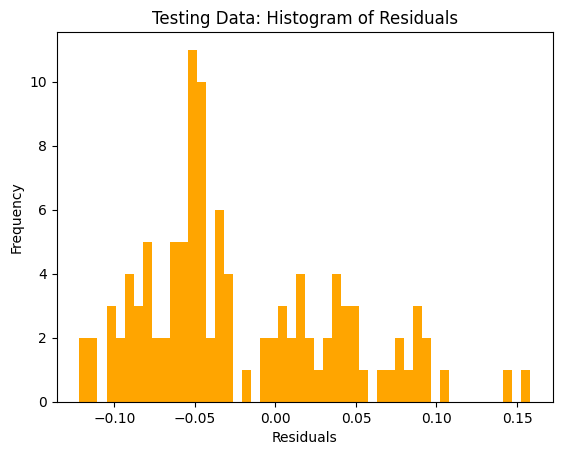

In [91]:
# Histogram of residuals for training data
plt.hist(y_train - y_pred_train, bins=50, color='blue')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Training Data: Histogram of Residuals")
plt.show()

# Histogram of residuals for testing data
plt.hist(y_test - y_pred_test, bins=50, color='orange')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Testing Data: Histogram of Residuals")
plt.show()

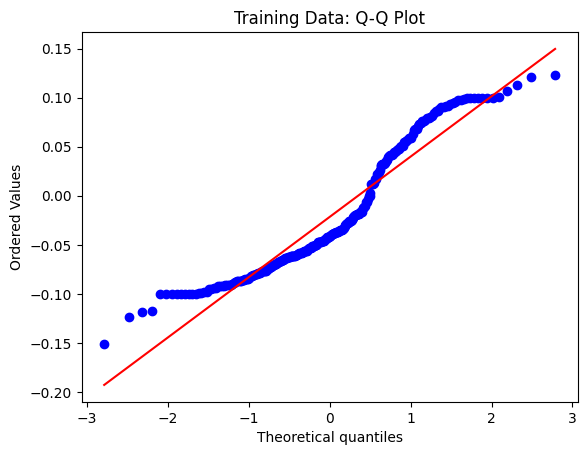

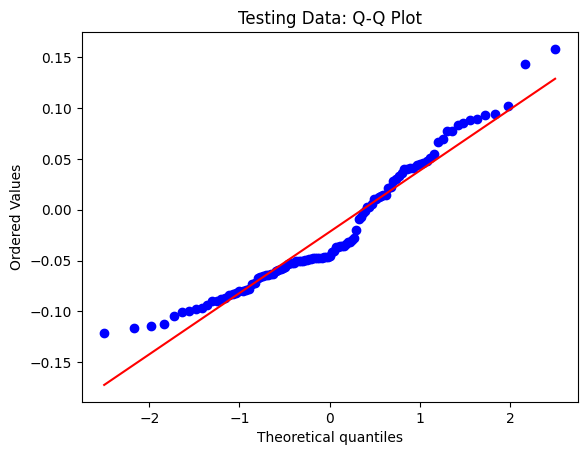

In [92]:
# Q-Q plot for training data
residuals_train = y_train - y_pred_train
scipy.stats.probplot(residuals_train, dist="norm", plot=plt)
plt.title("Training Data: Q-Q Plot")
plt.show()

# Q-Q plot for testing data
residuals_test = y_test - y_pred_test
scipy.stats.probplot(residuals_test, dist="norm", plot=plt)
plt.title("Testing Data: Q-Q Plot")
plt.show()

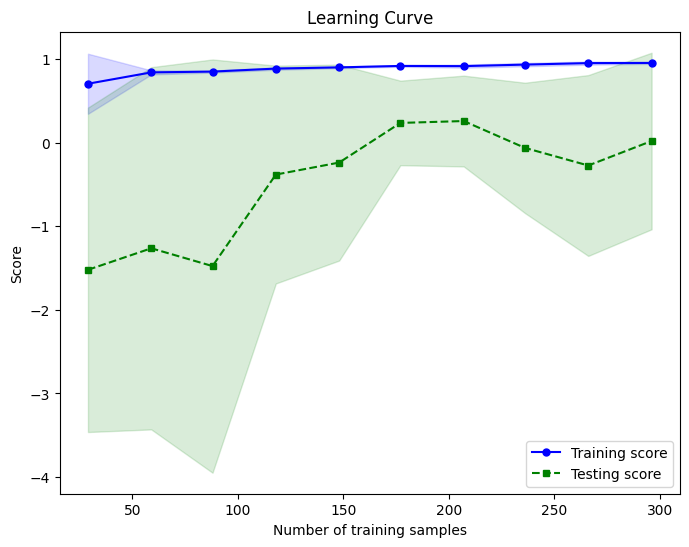

In [93]:
# # Learning curve
# from sklearn.model_selection import learning_curve

# train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=10, scoring='neg_mean_squared_error')
# train_scores_mean = np.mean(-train_scores, axis=1)
# test_scores_mean = np.mean(-test_scores, axis=1)

# plt.plot(train_sizes, train_scores_mean, label='Training Error')
# plt.plot(train_sizes, test_scores_mean, label='Validation Error')
# plt.xlabel("Training Set Size")
# plt.ylabel("MSE")
# plt.title("Learning Curve")
# plt.legend()
# plt.show()

# assuming you have already defined your regression model as "model"
# and have loaded your dataset into "X" and "y"

# create learning curve with 5-fold cross-validation
train_sizes, train_scores, test_scores = learning_curve(
    estimator=svr, X=X, y=y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# calculate mean and standard deviation of training and testing scores across folds
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Testing score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Number of training samples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='lower right')
plt.show()


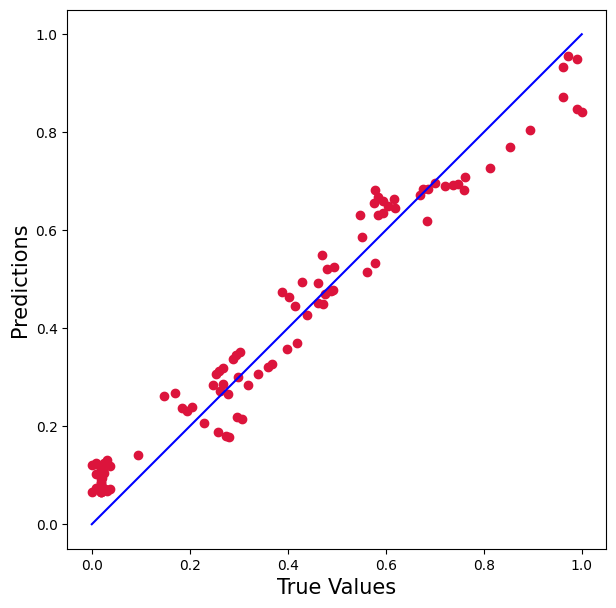

In [94]:
from matplotlib import pyplot as plt

plt.figure(figsize=(7,7))
plt.scatter(y_test,y_pred_test,c='crimson')

p1 = min(min(y_pred_test),min(y_test))
p2 = max(max(y_pred_test),max(y_test))
plt.plot([p1,p2],[p1,p2],'b-')
plt.xlabel('True Values', fontsize = 15)
plt.ylabel('Predictions', fontsize = 15)
plt.axis('equal')
plt.axis('square')
plt.show()


## ANN

In [95]:
X = data[['Ch-3','Ch-4','Ambient Temperature','Irradiance','Mirror']]
y = data['Hourly Productivity']

In [96]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [97]:
from sklearn.preprocessing import StandardScaler

In [98]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [99]:
!pip install keras
!pip install tensorflow
from keras import Sequential
from keras.layers import Dense

In [100]:
model = Sequential()
model.add(Dense(128, input_dim=5, activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(1,activation="linear"))

In [101]:
model.compile(loss="mean_squared_error", optimizer="adam", metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               768       
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9,089
Trainable params: 9,089
Non-trainable params: 0
_________________________________________________________________


In [102]:
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100)

Epoch 1/100
7/7 [==============================] - 2s 64ms/step - loss: 0.0281 - mae: 0.1340 - val_loss: 0.0124 - val_mae: 0.0946
Epoch 2/100
7/7 [==============================] - 0s 17ms/step - loss: 0.0060 - mae: 0.0618 - val_loss: 0.0032 - val_mae: 0.0472
Epoch 3/100
7/7 [==============================] - 0s 17ms/step - loss: 0.0044 - mae: 0.0559 - val_loss: 0.0026 - val_mae: 0.0429
Epoch 4/100
7/7 [==============================] - 0s 17ms/step - loss: 0.0017 - mae: 0.0329 - val_loss: 0.0015 - val_mae: 0.0323
Epoch 5/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0012 - mae: 0.0279 - val_loss: 5.1218e-04 - val_mae: 0.0156
Epoch 6/100
7/7 [==============================] - 0s 17ms/step - loss: 6.3259e-04 - mae: 0.0182 - val_loss: 5.0611e-04 - val_mae: 0.0155
Epoch 7/100
7/7 [==============================] - 0s 17ms/step - loss: 3.9476e-04 - mae: 0.0145 - val_loss: 5.5515e-04 - val_mae: 0.0162
Epoch 8/100
7/7 [==============================] - 0s 22ms/step - loss

In [103]:
y_pred_test = model.predict(X_test_scaled)

y_pred_train = model.predict(X_train_scaled)

9/9 [==============================] - 0s 3ms/step


In [104]:
from sklearn import metrics
print('Mean Absolute Error testing:',metrics.mean_absolute_error(y_test,y_pred_test))
print('Mean Squared Error testing:',metrics.mean_squared_error(y_test,y_pred_test))
print('Root Mean Squared Error testing:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))
print()
print()
print('Mean Absolute Error training:',metrics.mean_absolute_error(y_train,y_pred_train))
print('Mean Squared Error training:',metrics.mean_squared_error(y_train,y_pred_train))
print('Root Mean Squared Error training:',np.sqrt(metrics.mean_squared_error(y_train,y_pred_train)))

Mean Absolute Error testing: 0.0038019506293280087
Mean Squared Error testing: 4.1443691580578316e-05
Root Mean Squared Error testing: 0.006437677498957082


Mean Absolute Error training: 0.003245262934327458
Mean Squared Error training: 2.944162963449367e-05
Root Mean Squared Error training: 0.005426014157233067


In [105]:
r2_testing = metrics.r2_score(y_test,y_pred_test)
r2_training = metrics.r2_score(y_train,y_pred_train)
print('R2 score training: ', metrics.r2_score(y_test,y_pred_test))
print('R2 score testing: ', metrics.r2_score(y_train,y_pred_train))

Adjusted_R2_training = 1 - (1-r2_training)*(X_train.shape[0]-1)/(X_train.shape[0]-5-1)
Adjusted_R2_testing = 1 - (1-r2_testing)*(X_test.shape[0]-1)/(X_test.shape[0]-5-1)
print('Adjusted R2 score training : ', Adjusted_R2_training)
print('Adjusted R2 score testing : ', Adjusted_R2_testing)

R2 score training:  0.9760650083874227
R2 score testing:  0.9832670691601451
Adjusted R2 score training :  0.9829363788273416
Adjusted R2 score testing :  0.974925246882062


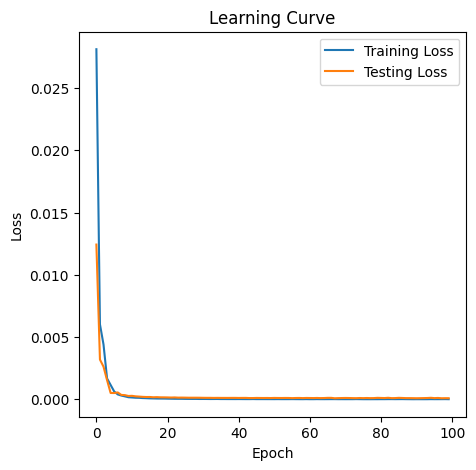

In [106]:
# Generate the six plots
fig, axes = plt.subplots(figsize=(5,5))

# Plot the learning curve
axes.plot(history.history['loss'], label='Training Loss')
axes.plot(history.history['val_loss'], label='Testing Loss')
axes.set_title('Learning Curve')
axes.set_xlabel('Epoch')
axes.set_ylabel('Loss')
axes.legend()

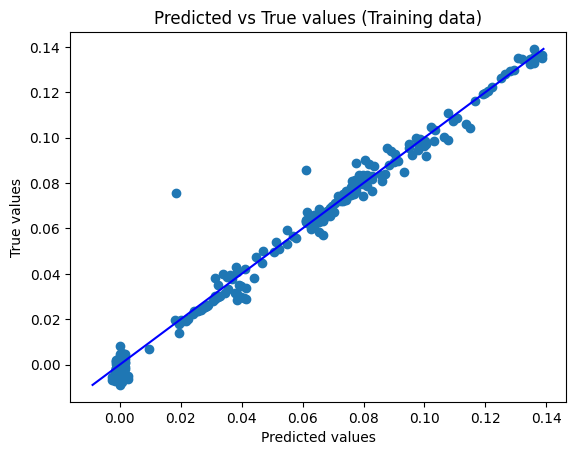

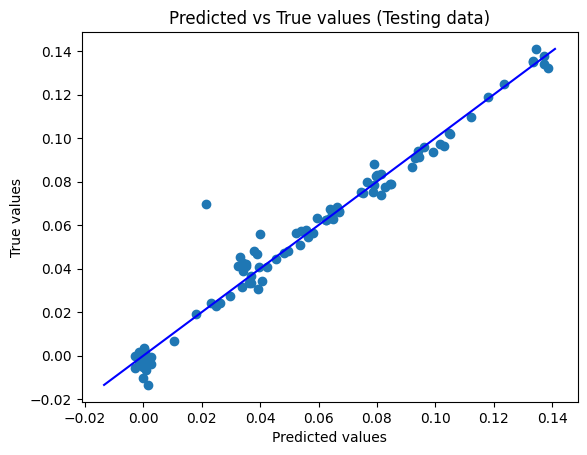

In [107]:
# Plot the predicted vs true values for the training data
plt.scatter(y_train, y_pred_train)
p1 = min(min(y_pred_train),min(y_train))
p2 = max(max(y_pred_train),max(y_train))
plt.plot([p1,p2],[p1,p2],'b-')
plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.title('Predicted vs True values (Training data)')
plt.show()

# Plot the predicted vs true values for the testing data
plt.scatter(y_test, y_pred_test)
p1 = min(min(y_pred_test),min(y_test))
p2 = max(max(y_pred_test),max(y_test))
plt.plot([p1,p2],[p1,p2],'b-')
plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.title('Predicted vs True values (Testing data)')
plt.show()

In [108]:
y_pred_train = y_pred_train.reshape(-1)
y_pred_test = y_pred_test.reshape(-1)

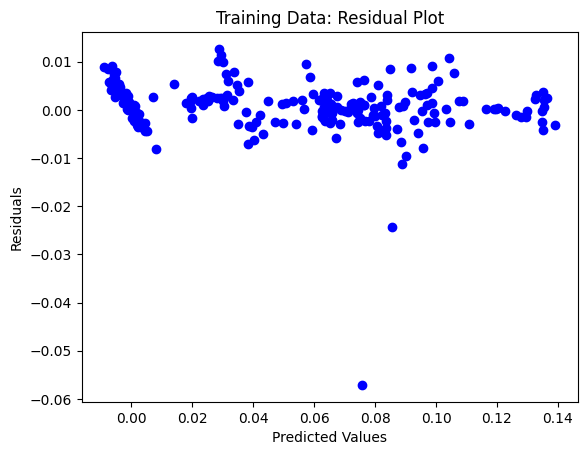

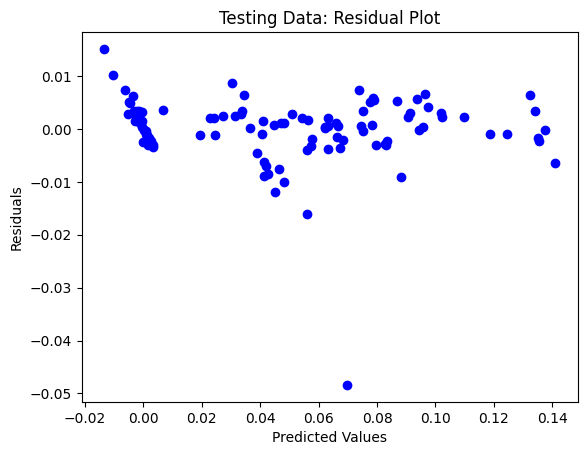

In [109]:
#Scatter for training data
# Residual plot for training data
plt.scatter(y_pred_train, y_train - y_pred_train, c='blue')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Training Data: Residual Plot")
plt.show()

# Residual plot for testing data
plt.scatter(y_pred_test, y_test - y_pred_test, c='blue')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Testing Data: Residual Plot")
plt.show()

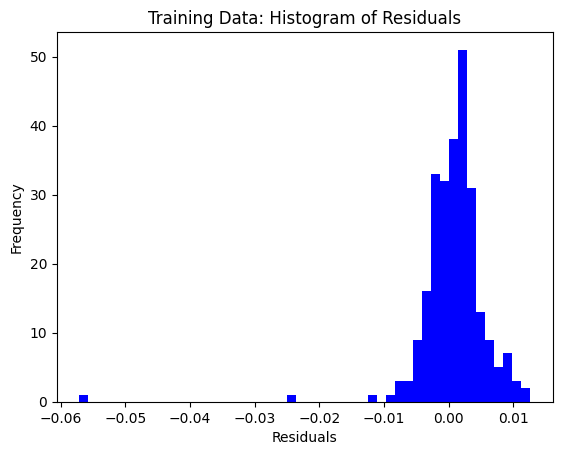

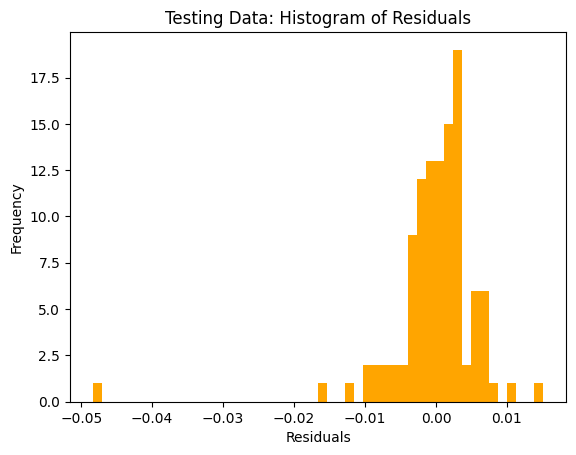

In [110]:
# Histogram of residuals for training data
plt.hist(y_train - y_pred_train, bins=50, color='blue')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Training Data: Histogram of Residuals")
plt.show()

# Histogram of residuals for testing data
plt.hist(y_test - y_pred_test, bins=50, color='orange')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Testing Data: Histogram of Residuals")
plt.show()

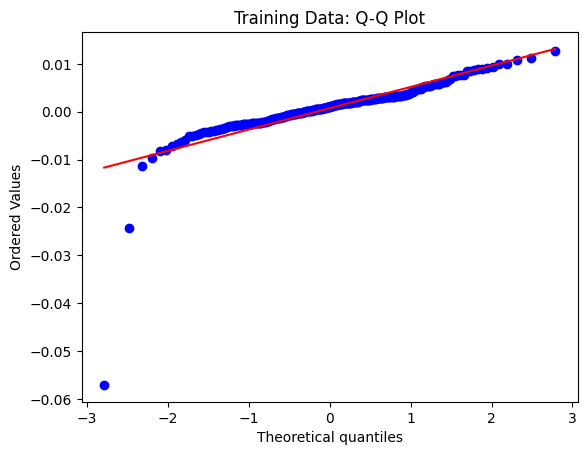

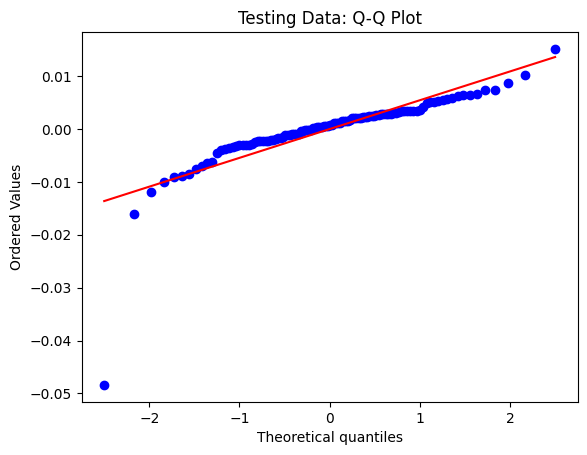

In [111]:
# Q-Q plot for training data
residuals_train = y_train - y_pred_train
scipy.stats.probplot(residuals_train, dist="norm", plot=plt)
plt.title("Training Data: Q-Q Plot")
plt.show()

# Q-Q plot for testing data
residuals_test = y_test - y_pred_test
scipy.stats.probplot(residuals_test, dist="norm", plot=plt)
plt.title("Testing Data: Q-Q Plot")
plt.show()